In [15]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan


data = pd.read_csv("Base de datos.txt", sep='\s+')

In [13]:
# Define the dependent variable (Y) and the independent variable (X1)
y = data['Y']
x = data['X1']

# Add a constant to the independent variable for the intercept
x = sm.add_constant(x)

# Perform the linear regression
model = sm.OLS(y, x).fit()

# Print the regression summary, which includes R-squared
print(model.summary())

correlation = data['Y'].corr(data['X1'])
print(f"The correlation coefficient between Y and X1 is: {correlation}")

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     30.96
Date:              vie., 26 sep. 2025   Prob (F-statistic):           4.98e-07
Time:                        22:23:38   Log-Likelihood:                -98.374
No. Observations:                  69   AIC:                             200.7
Df Residuals:                      67   BIC:                             205.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9919      0.646      1.535      0.1

In [16]:
# Tabla de ANOVA

# Perform linear regression using formula API for ANOVA
model_formula = smf.ols('Y ~ X1', data=data).fit()

# Generate ANOVA table
anova_table = anova_lm(model_formula)

# Print the ANOVA table
print(anova_table)

            df     sum_sq    mean_sq          F        PR(>F)
X1         1.0  32.322361  32.322361  30.963419  4.983572e-07
Residual  67.0  69.940538   1.043889        NaN           NaN


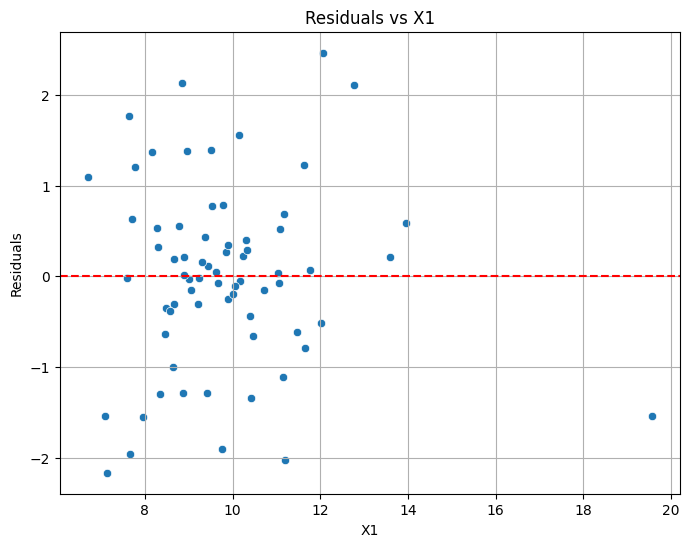

Shapiro-Wilk Test Statistic: 0.9791403719222306
Shapiro-Wilk Test p-value: 0.3023259078429156


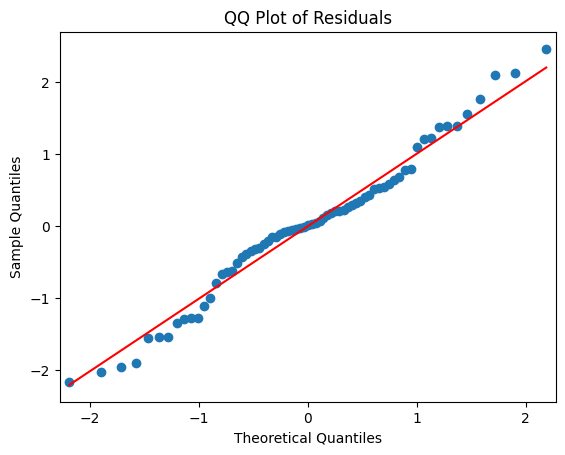

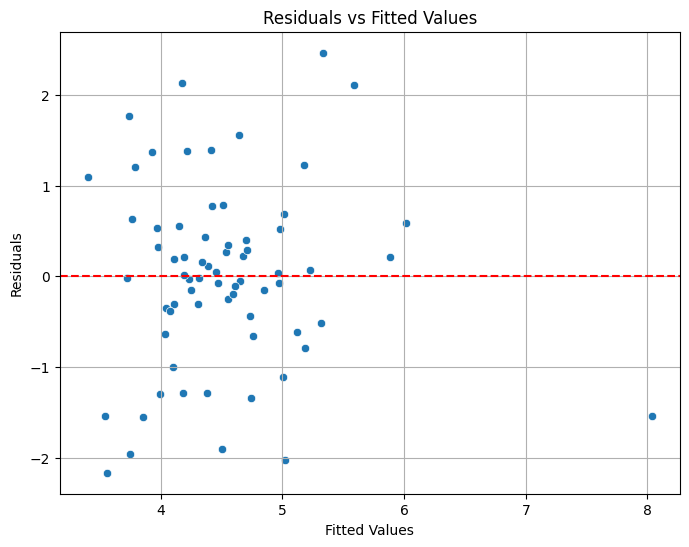

Breusch-Pagan Test Statistic: 0.02233245797158967
Breusch-Pagan Test p-value: 0.8812060695123798
Breusch-Pagan F-value: 0.021692161208332433
Breusch-Pagan F p-value: 0.883351285503287


In [ ]:
# EN TODAS ESTAS PRUEBAS BUSCAMOS P VALORES GRANDES PARA QUE SE CUMPLAN LOS SUPUESTOS


# VALIDACION DE SUPUESTOS: INDEPENDENCIA

# Calculate the residuals
residuals = model.resid

# Create a scatter plot of residuals vs X1
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['X1'], y=residuals)
plt.axhline(0, color='red', linestyle='--') # Add a horizontal line at y=0
plt.title('Residuals vs X1')
plt.xlabel('X1')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


# VALIDACION DE SUPUESTOS: NORMALIDAD

# Perform Shapiro-Wilk test on residuals
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}")
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")

# Create a QQ plot of residuals
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()


# VALIDACION DE SUPUESTOS: LINEALIDAD DEL MODELO

# Calculate the fitted values
fitted_values = model.fittedvalues

# Create a scatter plot of residuals vs fitted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--') # Add a horizontal line at y=0
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# VALIDACION DE SUPUESTOS: VARIANZA DE LOS ERRORES DEBE SER CONSTANTE

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)

# The output of the test is a tuple: (lagrange multiplier statistic, p-value, f-value, f p-value)
print(f"Breusch-Pagan Test Statistic: {bp_test[0]}")
print(f"Breusch-Pagan Test p-value: {bp_test[1]}")
print(f"Breusch-Pagan F-value: {bp_test[2]}")
print(f"Breusch-Pagan F p-value: {bp_test[3]}")

In [22]:
# Ya verificamos que nuestro modelo explicativo es significativo ( R^2 alto, errores de predicción bajos en datos nuevos y p < 0.05)
# Ya verificamos que la relación entre X y Y es lineal
# Ya verificamos que nuestro modelo cumple los supuestos de la regresión lineal
# Podemos usarlo para hacer predicciones

y = model.params.const + model.params.X1*10

y

np.float64(4.592006931876395)